# Exploratory Data Analysis on Super Store

## Introduction

Super Store is a small retail business located in the United States. They sell Furniture, Office Supplies and Technology products and their customers are the mass Consumer, Corporate and Home Offices. The data set contains sales, profit and geographical information of individual orders.

##### Our task is to determine weak areas and opportunities for Super Store to boost business growth.

## Business Questions

- Which Category is Best Selling and Most Profitable?

- What are the Best Selling and Most Profitable Sub-Category?

- Which is the Top Selling Sub-Category?

- Which Customer Segment is Most Profitable?

- Which is the Preferred Ship Mode?

- Which Region is the Most Profitable?

- Which City has the Highest Number of Sales?

#### Who is Reading this Analysis?

- We assume that the Super Store is a family business and is owned by 1 or 2 owners who are very invested in their business.
- Owners are likely not people who are expert in reading charts or interpreting statistical analysis, so our analysis will be in layman terms and easy to understand.
- They needs information to make informed decisions on how to boost business profit so, our analysis focus on finding weaknesses or opportunities and providing recommendations and marketing strategies.

---
### Importing the necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [3]:
#reading the data in CSV format
df = pd.read_csv('/Users/mac/Desktop/DataScience/EDA_Prac/EDA-Superstore/SampleSuperstore.csv')

### Data Exploration

In [4]:
#displaying the data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
#printing how many rows and cols are there in dataset
print('The dataset has:',df.shape[0],'rows')
print('The dataset has:',df.shape[1],'columns')

The dataset has: 9994 rows
The dataset has: 13 columns


In [23]:
#knowing how many features are categorical
cat_var_list = [cols for cols in df.columns if df[cols].dtype=='O']
print('There are total of',len(cat_var_list),'cat features in data.')
print()
print('Categorical Features are:')
for cat_features in cat_var_list:
    print(cat_features)

There are total of 8 cat features in data.

Categorical Features are:
Ship Mode
Segment
Country
City
State
Region
Category
Sub-Category


In [26]:
#knowing how many features are numerical
num_var_list = [cols for cols in df.columns if df[cols].dtype!='O']
print('There are total of',len(num_var_list),'num features in data.')
print()
print('Numerical Features are:')
for num_features in num_var_list:
    print(num_features)

There are total of 5 num features in data.

Numerical Features are:
Postal Code
Sales
Quantity
Discount
Profit


- Each row represents an order of an item and the corresponding quantity, sales, discount and profit. There is also the mode of shipment, customer segment and geographical aspects.

In [27]:
# Summarised information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


- Data type is correct and matches the corresponding values.

### Cleaning the Data
- Before we start our analysis it is really essential that we clean our data. Its well saying "Garbade in Garbage out". Therefore we would not want to analyse a data which is not correct in any way.

- The most common steps for cleaning any data is to check if there are any null or duplicate values

#### Handling Null values

In [28]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

- This shows that there is no null values in any column.

#### Handling duplicate data

In [30]:
df.duplicated().sum()

17

- So, there are 17 duplicated rows. Let's run another function to view the duplicated data.

In [31]:
# Show the duplicated rows
df[df.duplicated(keep = 'last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


In [32]:
# Drop the duplicated rows
df.drop_duplicates(inplace = True)

In [33]:
# Find the no. of rows and columns
df.shape

(9977, 13)

- Alright! We can confirm that the duplicated rows have been dropped as the rows were 9993 before and now it's reduced to 9977 rows.

#### Making a calculated field
- Gross Profit Margin = Gross Profit/Revenue, gross profit = revenue-cost
- Profit Margin = profit/revenue, it tells us how much profit a business earns for each dollor of revenue earned

In [34]:
df['Profit_Margin%'] = (df['Profit']/df['Sales'])*100

In [35]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Margin%
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


### Descriptive Analysis

In [37]:
#getting the descriptive analysis summary
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Margin%
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,12.011354
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,46.663769
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,7.500000
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,27.000000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,36.250000


### Observations:
- We can see here are some NaN values in some columns, now this is happening because we have included both numerical and categorical features. Therefore the metrics that are not right to describe the categorical values will have NaN values and similar is for numerical columns.

##### What we want to focus is the unique count and frequency of the categorical features such as:
- Ship mode has 4 unique values i.e there are 4 ship modes and 3 customer segments. Nearly half of the orders are from Standard Class Shipement. 

- There are 3 categories and 17 sub-categories. 60% orders are from office-supplies and at least 15% purchases are for binders.

##### While for numerical parameters, it's interesting to note that the:
- 75% of orders make atleast 36% of profit margin.

- Loss-making orders can go up to 275% losses. We must place emphasis on these loss-making sales to cut them off.

##### We will perform some analysis below to test these observations.

---

In [45]:
df['Sales'].skew()

12.9637703316881

- Sales data is extremly skewed.

## Exploratory Data Analysis

### 1. Which Category is Best Selling and Most Profitable?
- Best selling means looking at the sales and most profitable means looking at profit.

In [49]:
category_analysis = df.groupby('Category')['Sales','Profit','Quantity'].sum()
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


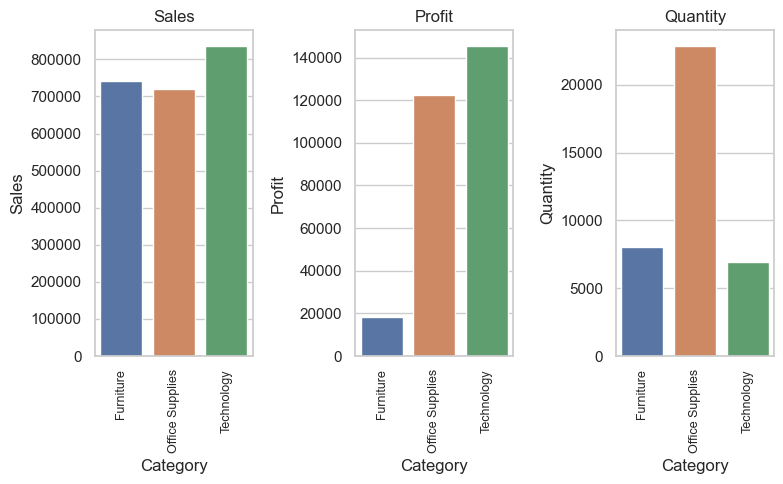

In [50]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

# Set spacing between subplots
figure.tight_layout()

Our observations are:

- All 3 categories - Furniture, Office Supplies and Technology make similar amount of sales.

- Technology is Best Selling and it's good to know that this category is the Most Profitable too. Only minimal quantity is sold as these products are usually one-off purchases that can last at least 4-5 years.

- Although Furniture makes similar sales as Technology, it is the least profitable and quantity sold are at a minimum too.

- Office Supplies sells the most in terms of quantity as it is relatively cheap product.

### 2. What are the Best Selling and Most Profitable Sub-Category?

In [58]:
subcategory_analysis = df.groupby('Sub-Category')['Profit','Sales'].sum()

# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcategory_analysis.sort_values('Sales', ascending = False))

subcat_profit = pd.DataFrame(subcategory_analysis.sort_values('Profit', ascending = False))

In [59]:
subcat_sales

,Profit,Sales
Sub-Category,,
Phones,44515.7306,330007.0540
Chairs,26567.1278,327777.7610
Storage,21278.8264,223843.6080
Tables,-17725.4811,206965.5320
Binders,30228.0003,203409.1690
Machines,3384.7569,189238.6310
Accessories,41936.6357,167380.3180
Copiers,55617.8249,149528.0300
Bookcases,-3472.5560,114879.9963


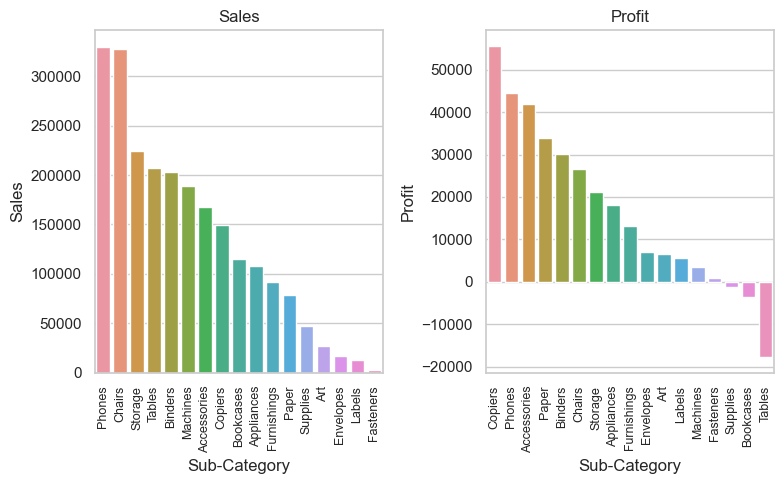

In [60]:
sns.set_theme(style = 'whitegrid')
figure, axis = plt.subplots(1, 2, figsize=(8, 5))

#plotting the graph
cat1 = sns.barplot(x=subcat_sales.index,y=subcat_sales['Sales'],ax=axis[0])
cat2 = sns.barplot(x=subcat_profit.index,y=subcat_profit['Profit'],ax=axis[1])

#title
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)

# Set spacing between subplots
figure.tight_layout()

Let's analyse the bar plots:

- Phones and Chairs are Top 2 best selling sub-category.
- Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.
- On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

### 3. Which is the top selling Sub-Category?

In [61]:
subcat_quantity = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


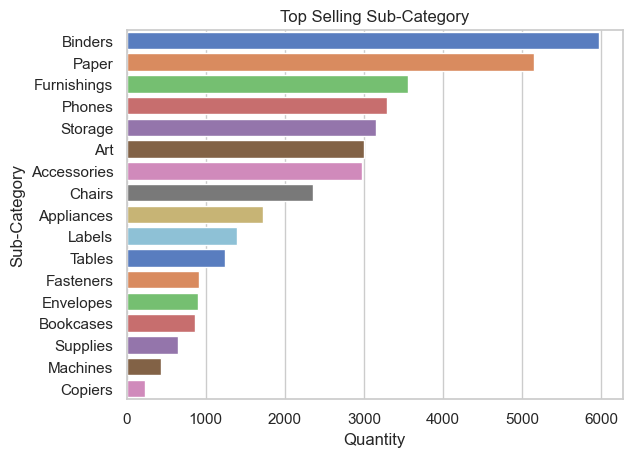

In [62]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

Here, we can deduce that

- Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.
- Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.

## 4. Which Customer Segment is Most Profitable?

In [64]:
segment_analysis = pd.DataFrame(df.groupby('Segment')['Profit'].sum())
segment_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


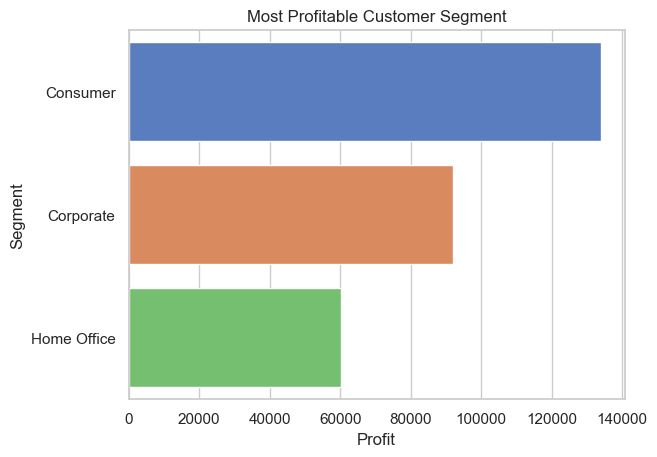

In [65]:
# Plot Bar Plot for Most Profitable Customer Segment
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, y = segment_analysis.index, x = segment_analysis.Profit, palette = "muted")
plt.title("Most Profitable Customer Segment")
plt.show()

- Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.

### 5. Which is the Preferred Ship Mode?

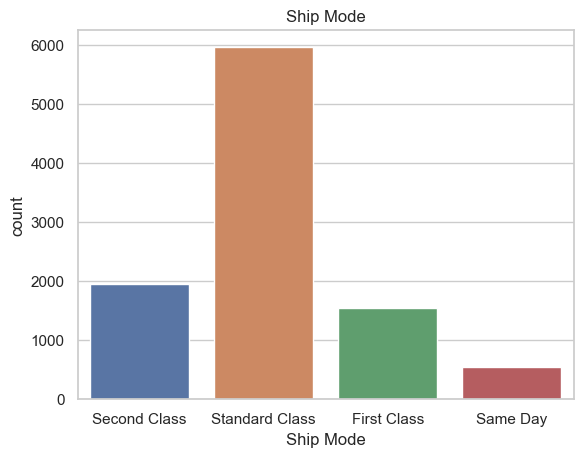

In [66]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(df['Ship Mode'])
plt.title("Ship Mode")
plt.show()

- By a landslide, Standard Class is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly.

### 6. Which Region is the Most Profitable?

In [73]:
region_analysis = pd.DataFrame(df.groupby('Region')['Profit'].sum()).sort_values('Profit',ascending=False)
region_analysis

,Profit
Region,
West,108329.8079
East,91506.3092
South,46749.4303
Central,39655.8752


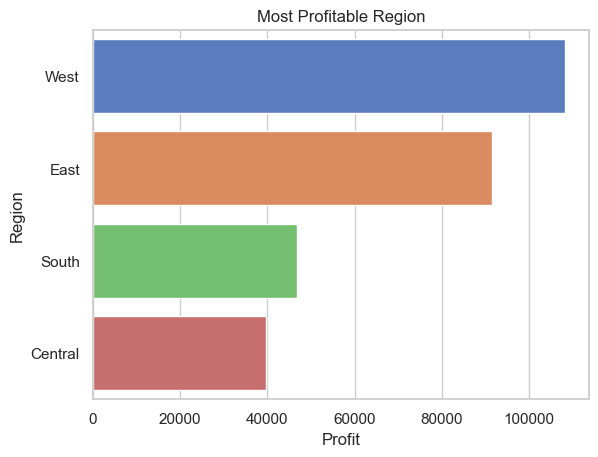

In [74]:
# Plot Bar Plot for Most Profitable Region
sns.set_theme(style="whitegrid")
sns.barplot(data = region_analysis, y = region_analysis.index, x = region_analysis.Profit, palette = "muted")
plt.title("Most Profitable Region")
plt.show()

- East and West region are most profitable.
- west and east together are contributing:

In [82]:
west_east = region_analysis.loc['West'][0] + region_analysis.loc['East'][0]
all_regions = region_analysis.loc['West'][0] + region_analysis.loc['East'][0] + \
region_analysis.loc['South'][0] + region_analysis.loc['Central'][0]

In [84]:
print('Profit that comes from West and East:',round((west_east/all_regions)*100,2))

Profit that comes from West and East: 69.81


- Almost 70% Profit comes from the regions West and East.

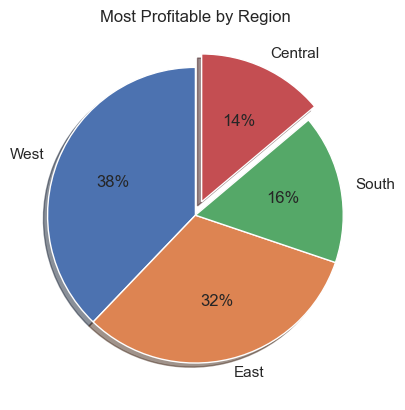

In [89]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]

plt.pie(region_analysis.Profit, labels = region_analysis.index, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")

plt.show()

- We can clearly see that Central region is the least profitable, we need to take measures.

### 7. Which City has the Highest Number of Sales?

In [90]:
city_sales = pd.DataFrame(df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))
top10 = city_sales[:10]
top10

,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [91]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


AttributeError: 'AxesSubplot' object has no attribute 'suptitle'

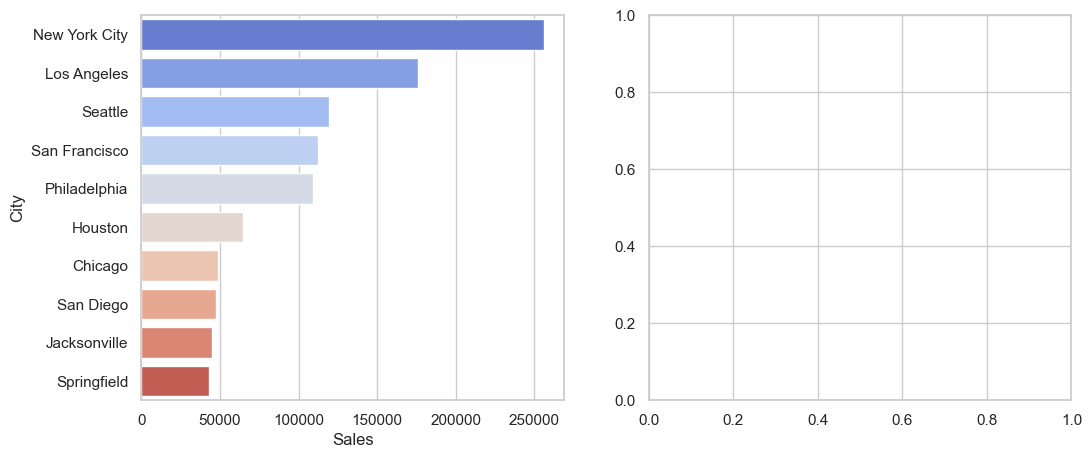

In [99]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme(style="whitegrid")

top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "coolwarm", ax = axis[0])
top10c.suptitle("Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])
bottom10c.suptitle( "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

# Set spacing between subplots
figure.tight_layout()

plt.show()


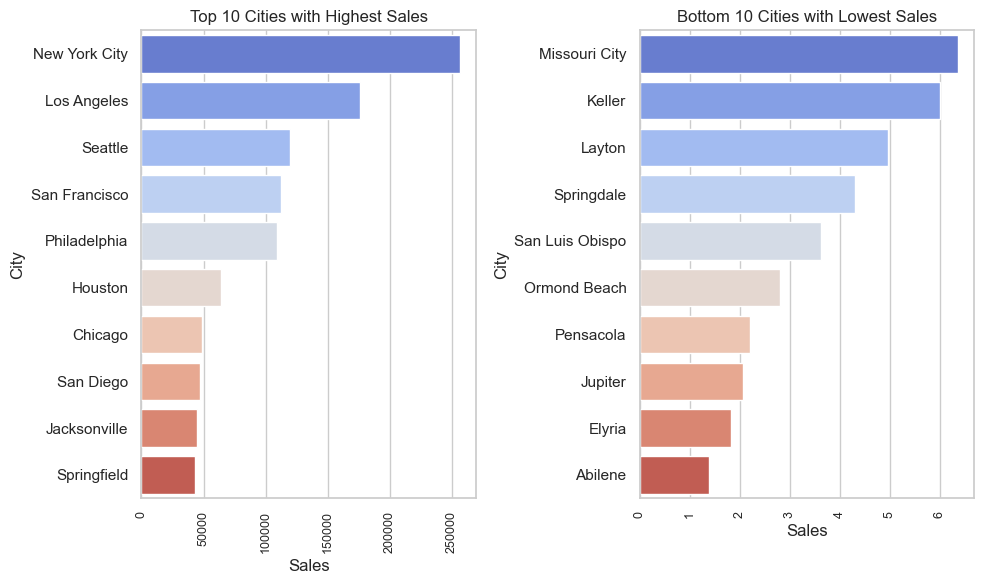

In [104]:
sns.set_theme(style = 'whitegrid')
figure, axis = plt.subplots(1, 2, figsize=(10, 6))

#plotting the graph
cat1 = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "coolwarm", ax = axis[0])
cat2 = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])

#title
cat1.set(title = 'Top 10 Cities with Highest Sales')
cat2.set(title = 'Bottom 10 Cities with Lowest Sales')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)

# Set spacing between subplots
figure.tight_layout()

- There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.

---

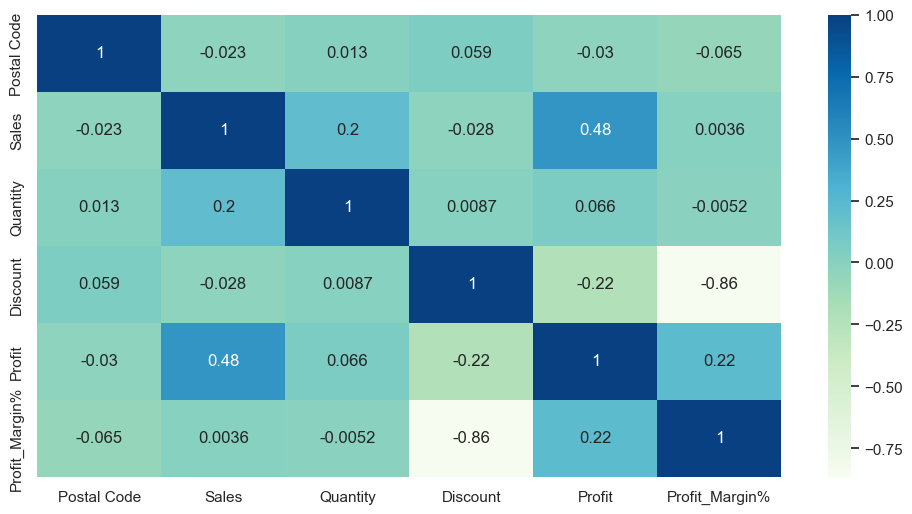

In [105]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'GnBu')

- From above heatmap we observed that Profits, Sales and Quantity these features/columns have strong bond, which means any slight change in any of these will impact the business

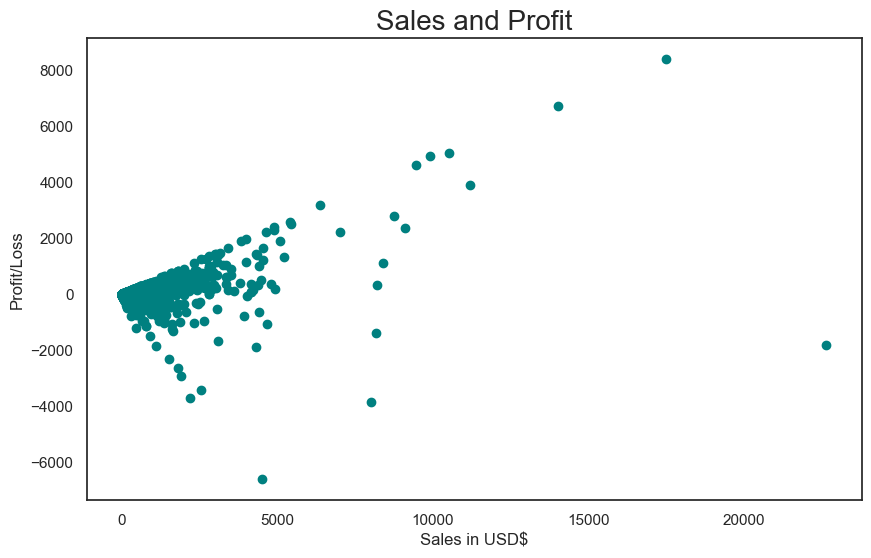

In [106]:
fig, ax = plt.subplots(figsize = (10, 6))
# scatterplot of Sales and Profit
ax.scatter(df["Sales"] , df["Profit"], color = 'Teal')
ax.set_xlabel('Sales in USD$')
ax.set_ylabel('Profit/Loss')
plt.title('Sales and Profit', fontsize = 20)
plt.show()

- Most sales are less than USD 5k. This is likely because a majority of the Superstore's customers are of the Consumer Segment - individuals who tend to buy and spend less than the other customer Segments comprising of groups and teams from Corporates and Home Offices.

- A significant number of transactions under USD 2.5k result in a loss. One likely reason behind smaller transaction amounts is after accounting for higher discount deductions, where this will decrease overall profits and can even cause a loss.

- Larger sales above USD 2.5k are very likely to result in a profit. Profit margins may be higher, after economies of scale in cost components such as procurement, packaging, and delivery.

---

### Strategic Recommendation

Here, we revisit our business questions and share with you our high-level business recommendations.

#### Business Questions

1. Which Category is Best Selling and Most Profitable?
2. What are the Best Selling and Most Profitable Sub-Category?
3. Which is the Top Selling Sub-Category?
4. Which Customer Segment is Most Profitable?
5. Which is the Preferred Ship Mode?
6. Which Region is the Most Profitable?

#### Recommendations

- Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.

- Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.

- For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.

- For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.

- Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.

Thank you.